# Shot Data Preprocessing and Forecast

### 1. Read the data
Read the data from .csv file.
The example data file is Kobe_Bryant_Shot.csv

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data filename
filename_data = 'Kobe_Bryant_Shot.csv'

# Read the data
data = pd.read_csv(filename_data)

In [5]:
# The shape of data
data.shape

(30697, 25)

In [6]:
# Some example of data
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


### 2. Data Cleaning
Clean the data with vacancy in "shot_made_flag" and some irrelevant features.
For example, we do not need features such as game_event_id, game_id, playoffs, team_id, team_name, game_date, matchup, opponent and shot_id to forecast hit rate.

In [7]:
# Clean the vacancy in "shot_made_flag"
data = data[pd.notnull(data['shot_made_flag'])]

# The shape of rest data
data.shape

(25697, 25)

In [8]:
data = data.drop(['game_event_id', 'game_id', 'playoffs', 'team_id',\
                  'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'], axis=1)
data.head()

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.
5,Jump Shot,Jump Shot,34.0553,-145,-11,-118.4148,9,3,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.


The "action_type" feature is the detailed version of "combined_shot_type", and we don't need to be that specific.

In [9]:
data.action_type.unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Reverse Dunk Shot', 'Slam Dunk Shot',
       'Driving Layup Shot', 'Turnaround Jump Shot', 'Reverse Layup Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Jump Hook Shot',
       'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Tip Shot',
       'Running Reverse Layup Shot', 'Driving Finger Roll Layup Shot',
       'Fadeaway Bank shot', 'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Turnaround Bank shot', 'Reverse Slam Dunk Shot',
   

In [10]:
data = data.drop(['action_type'], axis=1)

There are also some similar features, like both ("loc_x","loc_y") and ("lon","lat") describe the shot position, and "shot_zone_area", "shot_zone_basic" and "shot_zone_range" describe the zone of position.
We can visualize the similarity.

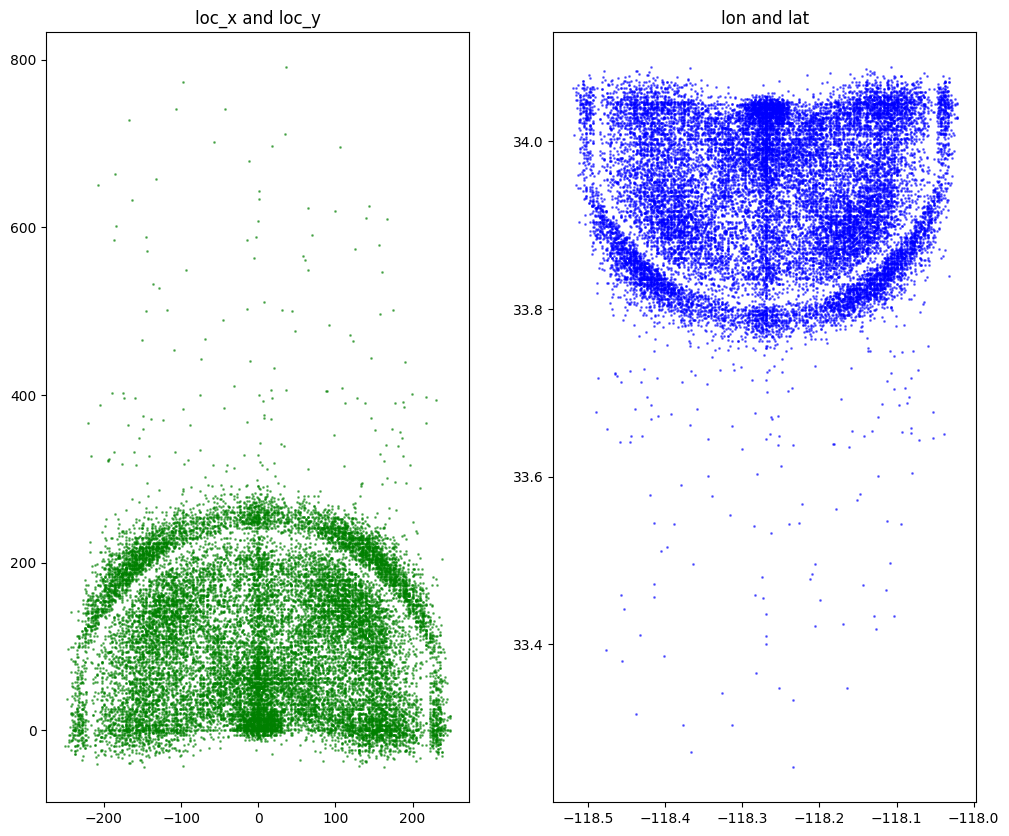

In [11]:
plt.figure(figsize=(12,10))

# Plot of (loc_x,loc_y)
plt.subplot(1,2,1)
plt.scatter(data.loc_x, data.loc_y, color='g', s=1, alpha = 0.5)
plt.title('loc_x and loc_y')

# Plot of (lon,lat)
plt.subplot(1,2,2)
plt.scatter(data.lon, data.lat, color='b', s=1, alpha=0.5)
plt.title('lon and lat')

plt.show()

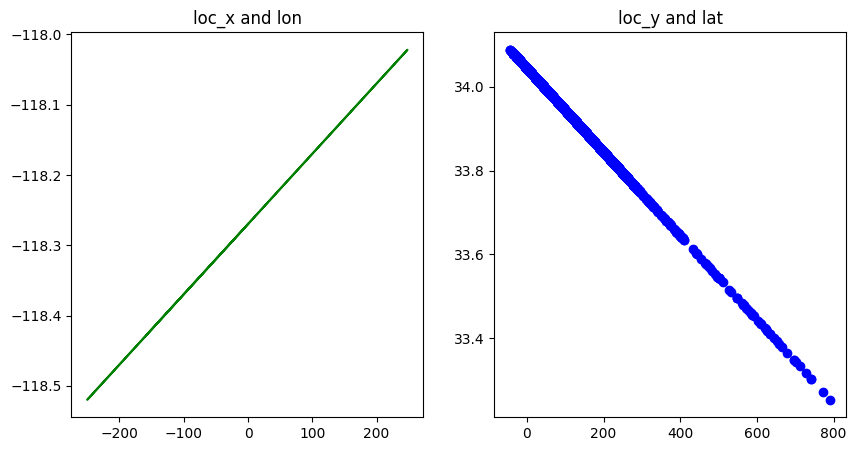

In [12]:
plt.figure(figsize=(10,5))
# Plot of (loc_x,loc_y)
plt.subplot(1,2,1)
plt.plot(data.loc_x, data.lon, color='g')
plt.title('loc_x and lon')

# Plot of (lon,lat)
plt.subplot(1,2,2)
plt.scatter(data.loc_y, data.lat, color='b')
plt.title('loc_y and lat')

plt.show()

In [13]:
data=data.drop(['lon', 'lat'], axis=1)

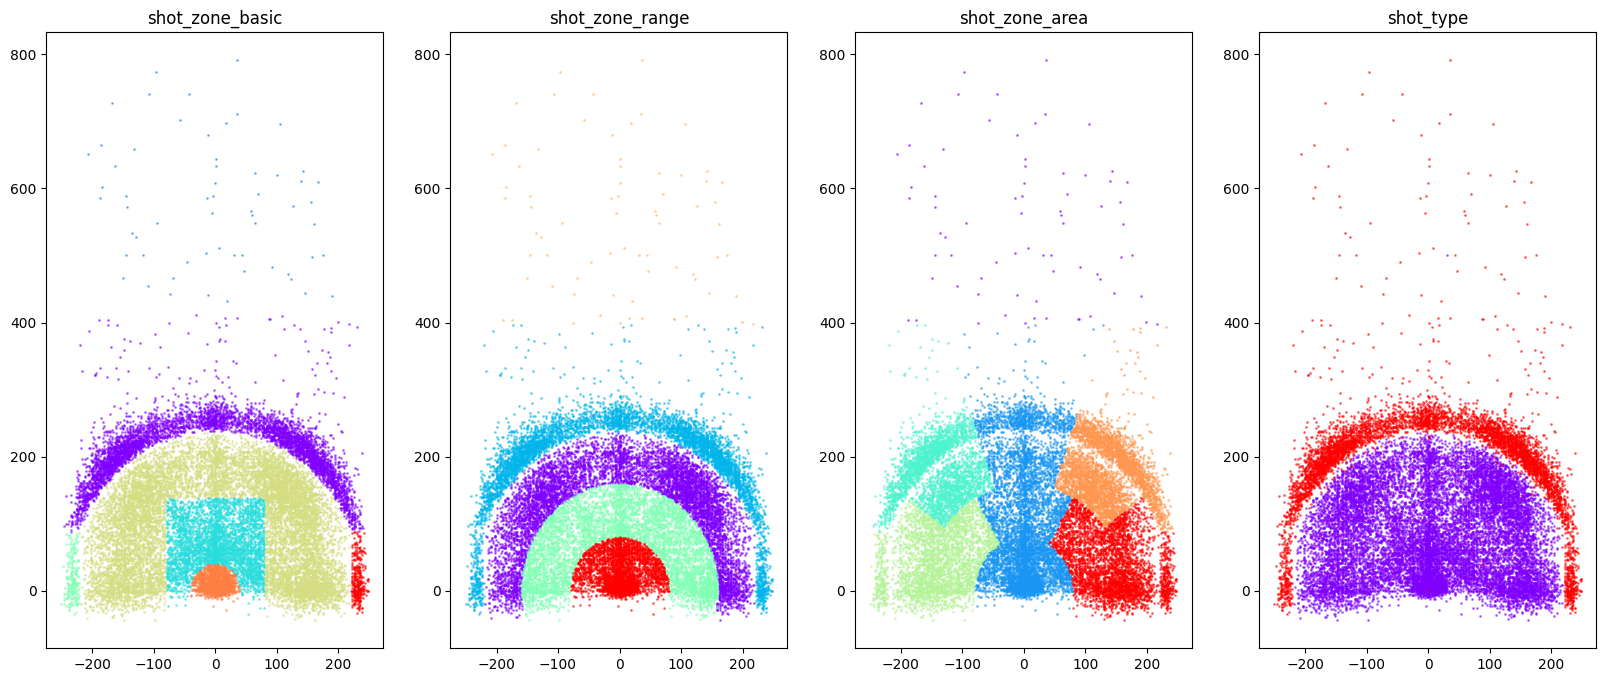

In [14]:
import matplotlib.cm as cm
plt.figure(figsize=(20,8))
 
def scatterbygroup(feature):
    gb = data.groupby(feature)
    cl = cm.rainbow(np.linspace(0,1,len(gb)))
    for g,c in zip(gb,cl):
        plt.scatter(g[1].loc_x,g[1].loc_y,color = c,s = 1, alpha = 0.5)
 
plt.subplot(1,4,1)
scatterbygroup('shot_zone_basic')
plt.title('shot_zone_basic')
 
plt.subplot(1,4,2)
scatterbygroup('shot_zone_range')
plt.title('shot_zone_range')
 
plt.subplot(1,4,3)
scatterbygroup('shot_zone_area')
plt.title('shot_zone_area')

plt.subplot(1,4,4)
scatterbygroup('shot_type')
plt.title('shot_type')

plt.show()

We decide to combine "shot_zone_basic" and "shot_zone_area" to give a detailed shot zone.

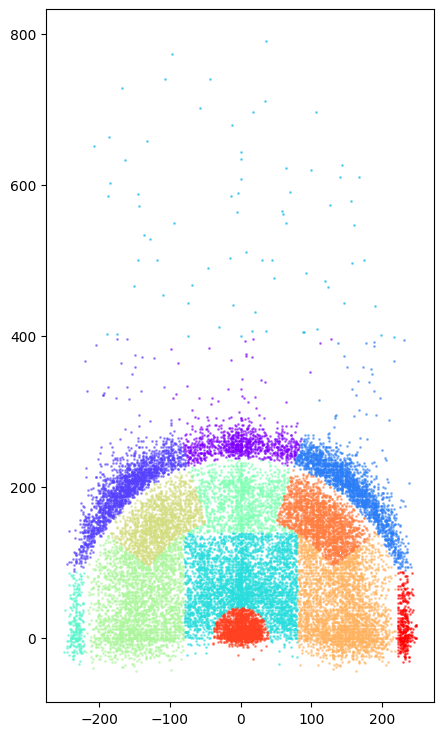

In [15]:
data['shot_zone']=data['shot_zone_basic']
area={'Left Side(L)':'L', 'Left Side Center(LC)': 'LC', 'Right Side Center(RC)':'RC',
     'Center(C)':'C', 'Right Side(R)':'R', 'Back Court(BC)':'BC'}
data.loc[data.shot_zone_basic=='Mid-Range', 'shot_zone']='Mid-Range '+data.shot_zone_area.apply(lambda x:area[x])
data.loc[data.shot_zone_basic=='Above the Break 3', 'shot_zone']='3PT '+data.shot_zone_area.apply(lambda x:area[x])
data.loc[(data.shot_zone_basic=='Above the Break 3')&(data.shot_zone_area=='Back Court(BC)'), 'shot_zone']='Backcourt'
plt.figure(figsize=(5,9))
scatterbygroup('shot_zone')
plt.show()

There are also features that can be combined together, such as "minutes_remaining" and "seconds_remaining"

In [16]:
data['remain_time'] = data['minutes_remaining'] * 60 + data['seconds_remaining']
data = data.drop(['minutes_remaining', 'seconds_remaining'], axis = 1)

And the feature "season" is not number, and hard to evaluate by computer. So we consider to make it a number by choosing the former year in the season.

In [17]:
data['season'] = data['season'].apply(lambda x: int(x.split('-')[0]))

And the "shot_made_flag" seems to be a float but not an integer, but it's better to make it an integer

In [18]:
data['shot_made_flag'] = data['shot_made_flag'].astype(int)

There are still similar features, like "shot_distance" can be calculated by "loc_x" and "loc_y"

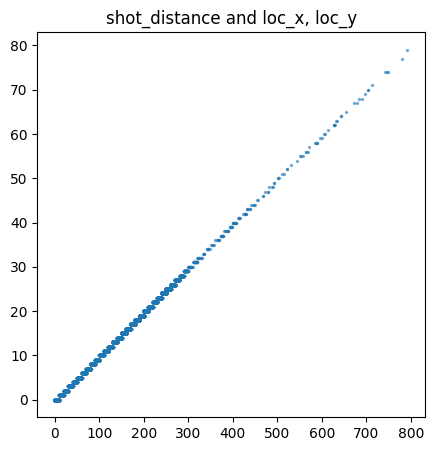

In [19]:
plt.figure(figsize=(5,5))    
plt.scatter((data.loc_x**2+data.loc_y**2)**0.5, data.shot_distance, s=2, alpha=0.5)
plt.title('shot_distance and loc_x, loc_y')
plt.show()

So we decide to use the feature of shot distance and angle for prediction instead of loc_x and loc_y

In [20]:
data=data.drop(['shot_distance'],axis=1)
data['dist']=(data.loc_x**2+data.loc_y**2)**0.5
data['angle']=np.arctan2(data.loc_x,data.loc_y)/np.pi*180.0

print(data.shape)
data.head(5)

(25697, 14)


,combined_shot_type,loc_x,loc_y,period,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_zone,remain_time,dist,angle
1,Jump Shot,-157,0,1,2000,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Mid-Range L,622,157.000000,-90.000000
2,Jump Shot,-101,135,1,2000,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Mid-Range LC,465,168.600119,-36.801931
3,Jump Shot,138,175,1,2000,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Mid-Range RC,412,222.865430,38.258303
4,Dunk,0,0,2,2000,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Restricted Area,379,0.000000,0.000000
5,Jump Shot,-145,-11,3,2000,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Mid-Range L,572,145.416643,-94.338267


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   combined_shot_type  25697 non-null  object 
 1   loc_x               25697 non-null  int64  
 2   loc_y               25697 non-null  int64  
 3   period              25697 non-null  int64  
 4   season              25697 non-null  int64  
 5   shot_made_flag      25697 non-null  int32  
 6   shot_type           25697 non-null  object 
 7   shot_zone_area      25697 non-null  object 
 8   shot_zone_basic     25697 non-null  object 
 9   shot_zone_range     25697 non-null  object 
 10  shot_zone           25697 non-null  object 
 11  remain_time         25697 non-null  int64  
 12  dist                25697 non-null  float64
 13  angle               25697 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(6)
memory usage: 3.9+ MB


## 3. Analyze the data with visualization

Let's see the distribution of successful shot and unsuccessful shot

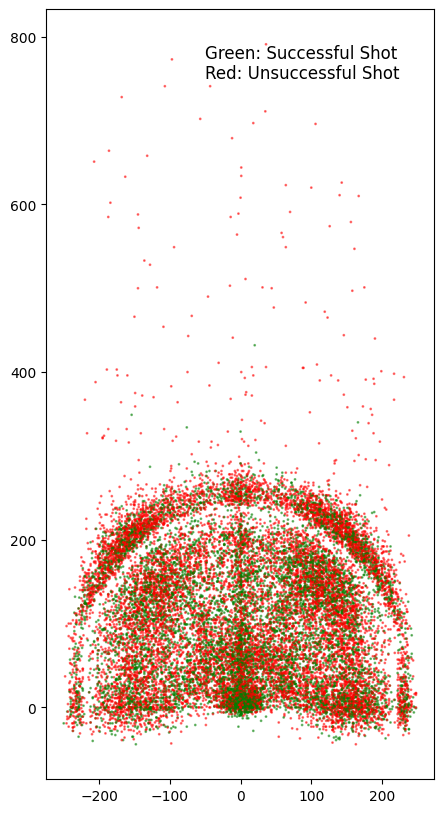

In [22]:
colors={0:'red', 1:'green'}
plt.figure(figsize=(5,10))
plt.scatter(data.loc_x, data.loc_y, c=data['shot_made_flag'].apply(lambda x:colors[x]), s=1, alpha=0.5)
plt.annotate('Green: Successful Shot\nRed: Unsuccessful Shot', xy=[-50,750], size=12)
plt.show()

Different shot types and their hit rates

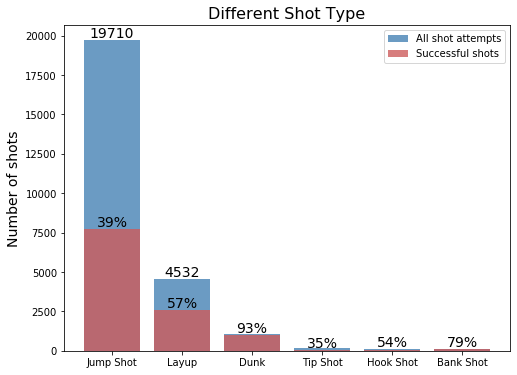

In [20]:
def gethitrate(figure):
    count1=dict(data[figure].value_counts())
    xdata=list(count1.keys())
    ydata1=list(count1.values())
    count2=dict(data[data.shot_made_flag==1][figure].value_counts())
    for x in xdata:
        if x not in count2.keys():
            count2[x]=0
    ydata2=[count2[x] for x in xdata]
    hitrate=np.array([y2/y1 for y1,y2 in zip(ydata1,ydata2)])
    return (xdata,ydata1,ydata2,hitrate)

def plotbyfigure(figure, title, size=(8,6), shownum=None, wid=0.8):
    (xdata,ydata1,ydata2,hitrate)=gethitrate(figure)
    
    plt.figure(figsize=size)
    plt.bar(x=xdata, height=ydata1,width=wid, label='All shot attempts', color='steelblue', alpha=0.8)
    plt.bar(x=xdata, height=ydata2,width=wid, label='Successful shots', color='indianred', alpha=0.8)
    if shownum is None:    
        for i in range(0,len(xdata)):
            plt.text(xdata[i], ydata1[i], '%d'%ydata1[i], ha='center', size=14, va='bottom')
    else:
        for i in range(0,shownum):
            plt.text(xdata[i], ydata1[i], '%d'%ydata1[i], ha='center', size=14, va='bottom')
    for i in range(len(xdata)):
        plt.text(xdata[i], ydata2[i], '%.0f%%'%(hitrate[i]*100), ha='center', size=14, va='bottom')
    plt.legend()
    plt.ylabel('Number of shots',size=14)
    plt.title(title,size=16)
    plt.show()

plotbyfigure('combined_shot_type', 'Different Shot Type', size=(8,6), shownum=2)

Hit rate of 2-pt and 3-pt

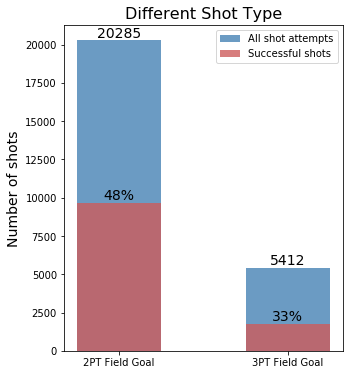

In [21]:
plotbyfigure('shot_type', 'Different Shot Type', size=(5,6), wid=0.5)

Hit rates of different shot zones. We can see that Kobe didn't have a good hit rate in left corner 3.

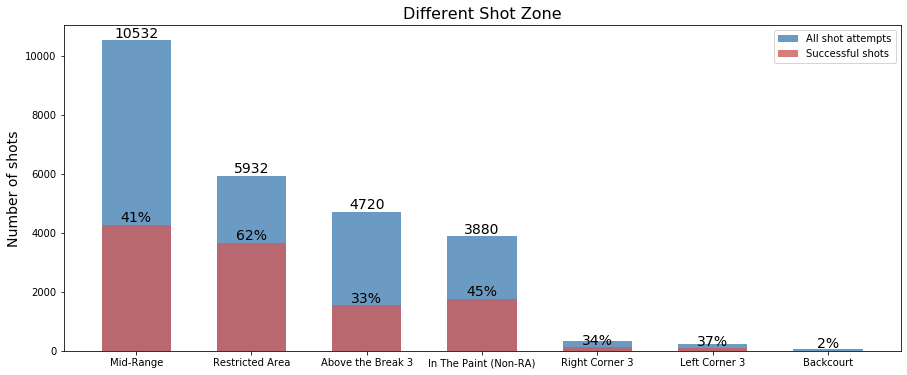

In [22]:
plotbyfigure('shot_zone_basic', 'Different Shot Zone', size=(15,6), shownum=4, wid=0.6)

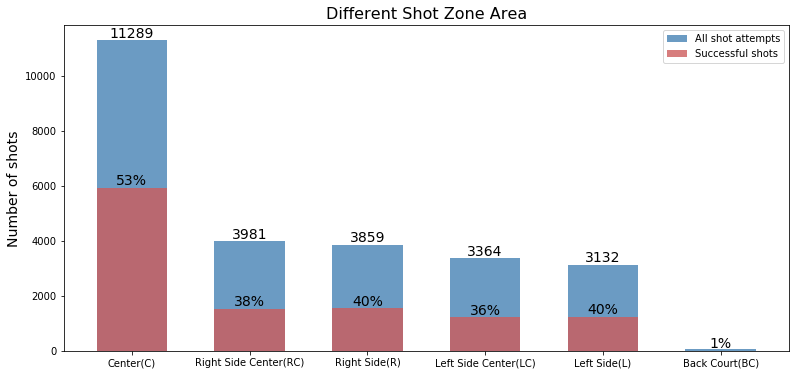

In [23]:
plotbyfigure('shot_zone_area', 'Different Shot Zone Area', size=(13,6), shownum=5, wid=0.6)

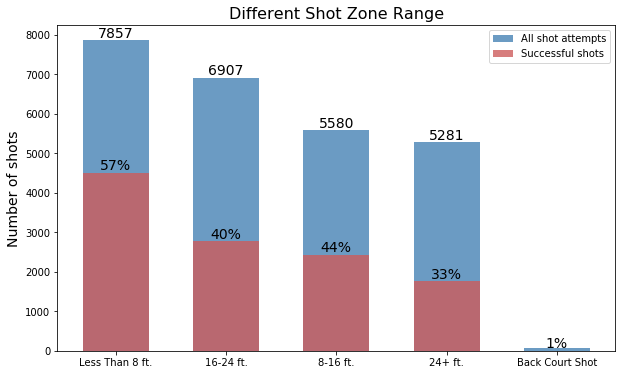

In [24]:
plotbyfigure('shot_zone_range', 'Different Shot Zone Range', size=(10,6), shownum=4, wid=0.6)

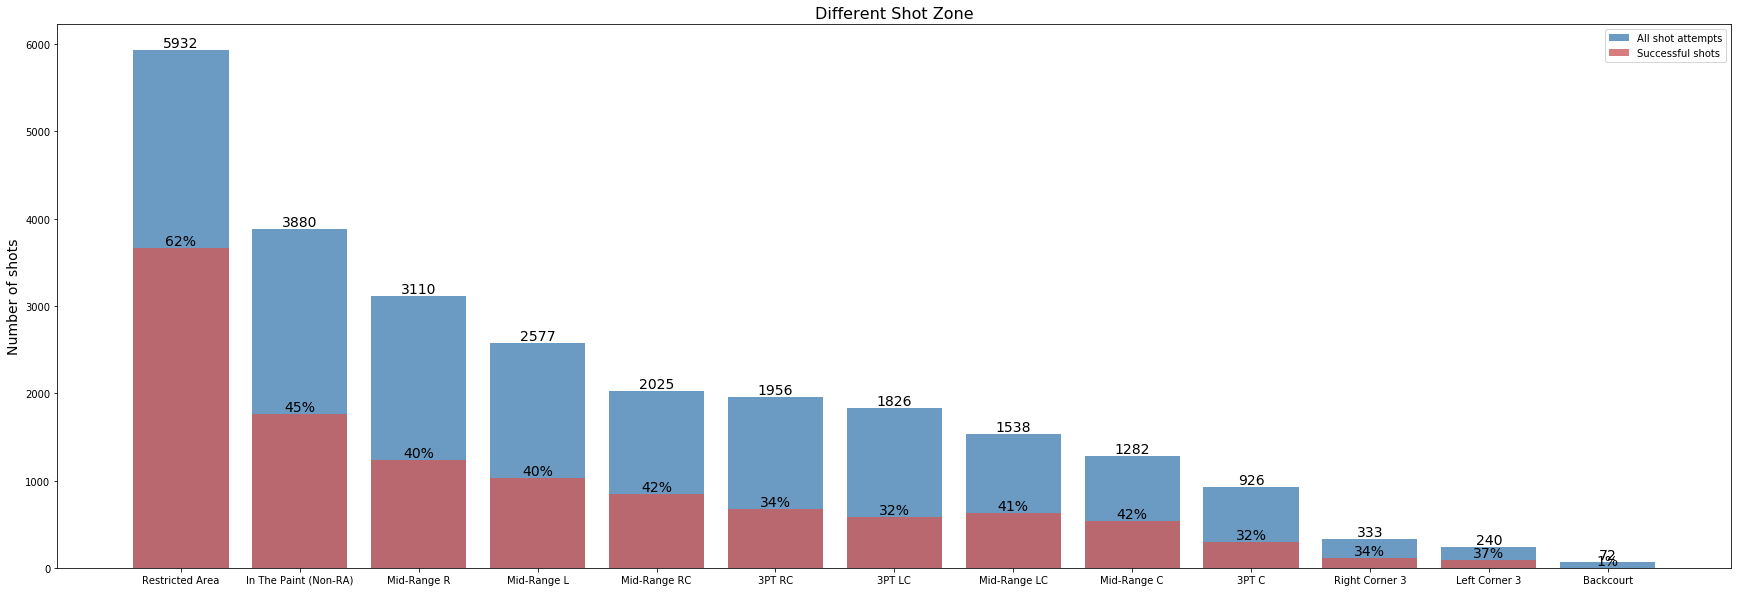

In [25]:
plotbyfigure('shot_zone', 'Different Shot Zone', size=(30,10))

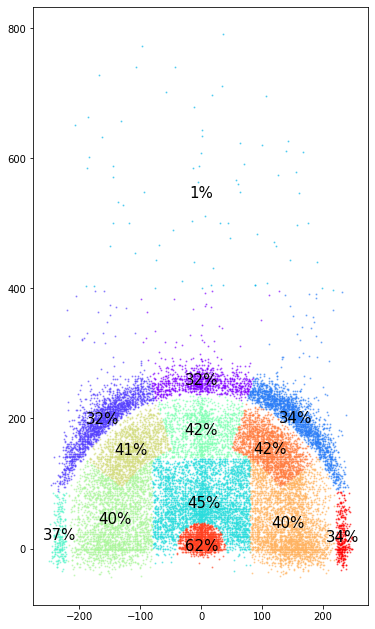

In [26]:
figure='shot_zone'
plt.figure(figsize=(6,11))
scatterbygroup('shot_zone')
(xdata,ydata1,ydata2,hitrate)=gethitrate('shot_zone')
for i in range(len(xdata)):
    plt.annotate('%.0f%%'%(hitrate[i]*100), xy=(data[data[figure]==xdata[i]].loc_x.mean(),data[data[figure]==xdata[i]].loc_y.mean()),
                 size=15, horizontalalignment='center', verticalalignment='center')

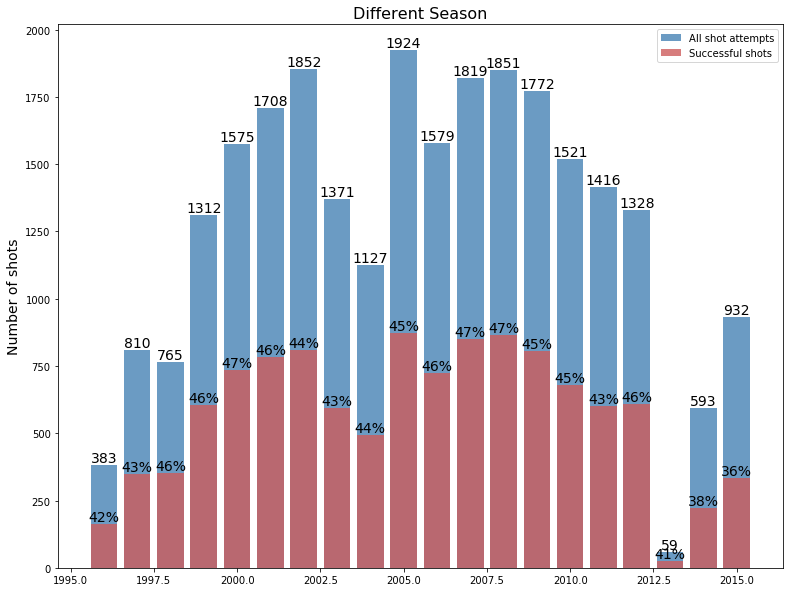

In [27]:
plotbyfigure('season','Different Season',size=(13,10))

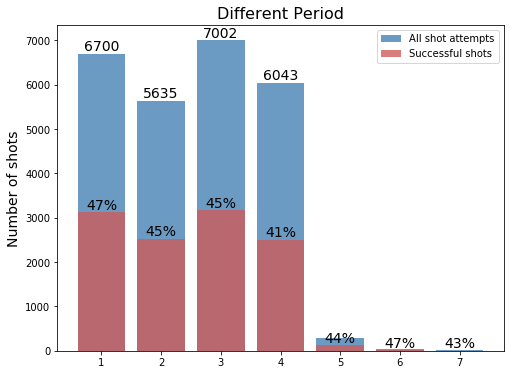

In [28]:
plotbyfigure('period', 'Different Period',shownum=4)

## 4. Forecast Hit Rate
We want to use supervised learning algorithms to forecast hit rate, while we can use the parameters in the trained models to analyze shot habit of different players.

### Preparation
We need to first change the features recorded in strings to quantitative values with one-hot code, so that computer can deal with these values. On the meanwhile, we need to discard the shot-zone features, which can be inferred from the precise shot location.

In [29]:
data = data.drop(['shot_zone', 'shot_zone_basic', 'shot_zone_range', 'shot_zone_area', 'shot_type', 'loc_x', 'loc_y'], axis=1)

In [30]:
features_onehot = ['combined_shot_type']
for i in features_onehot:
    data = pd.concat([data, pd.get_dummies(data[i],prefix=i)], 1)
    data = data.drop(i, 1)
data.head()

,period,season,shot_made_flag,remain_time,dist,angle,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
1,1,2000,0,622,157.000000,-90.000000,0,0,0,1,0,0
2,1,2000,1,465,168.600119,-36.801931,0,0,0,1,0,0
3,1,2000,0,412,222.865430,38.258303,0,0,0,1,0,0
4,2,2000,1,379,0.000000,0.000000,0,1,0,0,0,0
5,3,2000,0,572,145.416643,-94.338267,0,0,0,1,0,0


And then take out the figure "shot_made_flag" as label y

In [31]:
x = data.drop('shot_made_flag', 1)
y = data['shot_made_flag']

Let's visualize the shot with the location

In [32]:
x_loc = x.loc[:,['dist', 'angle']]

In [33]:
x_loc.head()

,dist,angle
1,157.000000,-90.000000
2,168.600119,-36.801931
3,222.865430,38.258303
4,0.000000,0.000000
5,145.416643,-94.338267


In [34]:
from matplotlib.colors import ListedColormap

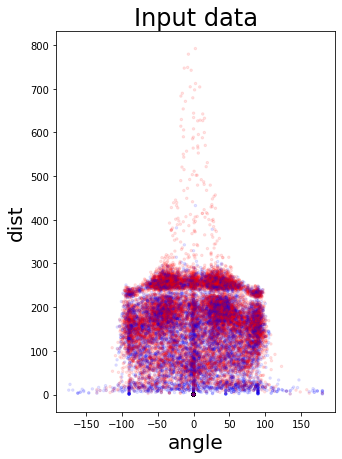

In [35]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(5,7))
plt.scatter(x_loc.loc[:, 'angle'], x.loc[:, 'dist'], c=y, s=6,
           alpha=0.1, cmap=cm_bright)
plt.xlabel('angle',fontsize=20)
plt.ylabel('dist',fontsize=20)
plt.title('Input data', fontsize=24)
plt.show()

We should exclude the shot from backcourt

In [36]:
data_noback = data[data['dist'] < 320.0]
data.shape

(25697, 12)

In [37]:
data_noback.head()

,period,season,shot_made_flag,remain_time,dist,angle,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
1,1,2000,0,622,157.000000,-90.000000,0,0,0,1,0,0
2,1,2000,1,465,168.600119,-36.801931,0,0,0,1,0,0
3,1,2000,0,412,222.865430,38.258303,0,0,0,1,0,0
4,2,2000,1,379,0.000000,0.000000,0,1,0,0,0,0
5,3,2000,0,572,145.416643,-94.338267,0,0,0,1,0,0


In [38]:
x = data_noback.drop('shot_made_flag', 1)
y = data_noback['shot_made_flag']
x_loc = x.loc[:,['angle', 'dist']]

In [39]:
x.shape

(25556, 11)

In [40]:
x.head()

,period,season,remain_time,dist,angle,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
1,1,2000,622,157.000000,-90.000000,0,0,0,1,0,0
2,1,2000,465,168.600119,-36.801931,0,0,0,1,0,0
3,1,2000,412,222.865430,38.258303,0,0,0,1,0,0
4,2,2000,379,0.000000,0.000000,0,1,0,0,0,0
5,3,2000,572,145.416643,-94.338267,0,0,0,1,0,0


In [41]:
x.columns.values

array(['period', 'season', 'remain_time', 'dist', 'angle',
       'combined_shot_type_Bank Shot', 'combined_shot_type_Dunk',
       'combined_shot_type_Hook Shot', 'combined_shot_type_Jump Shot',
       'combined_shot_type_Layup', 'combined_shot_type_Tip Shot'],
      dtype=object)

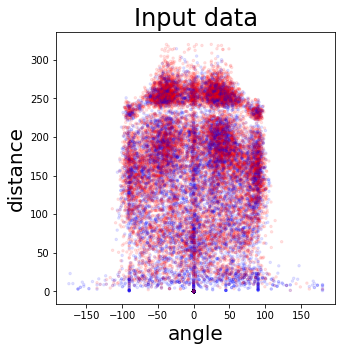

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(x_loc.loc[:, 'angle'], x.loc[:, 'dist'], c=y, s=6,
           alpha=0.1, cmap=cm_bright)
plt.xlabel('angle',fontsize=20)
plt.ylabel('distance',fontsize=20)
plt.title('Input data', fontsize=24)
plt.show()

### Algorithms

#### Different Algorithms

Let's first check the performance of different algorithms

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 5.0  # step size in the mesh

names = ["Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(C=0.025, solver='lbfgs'),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


In [44]:
X_train_loc, X_test_loc, y_train_loc, y_test_loc = \
        train_test_split(x_loc, y, test_size=.25, random_state=None)
x_min, x_max = x_loc.loc[:, 'angle'].min() - .5, x_loc.loc[:, 'angle'].max() + .5
y_min, y_max = x_loc.loc[:, 'dist'].min() - .5, x_loc.loc[:, 'dist'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

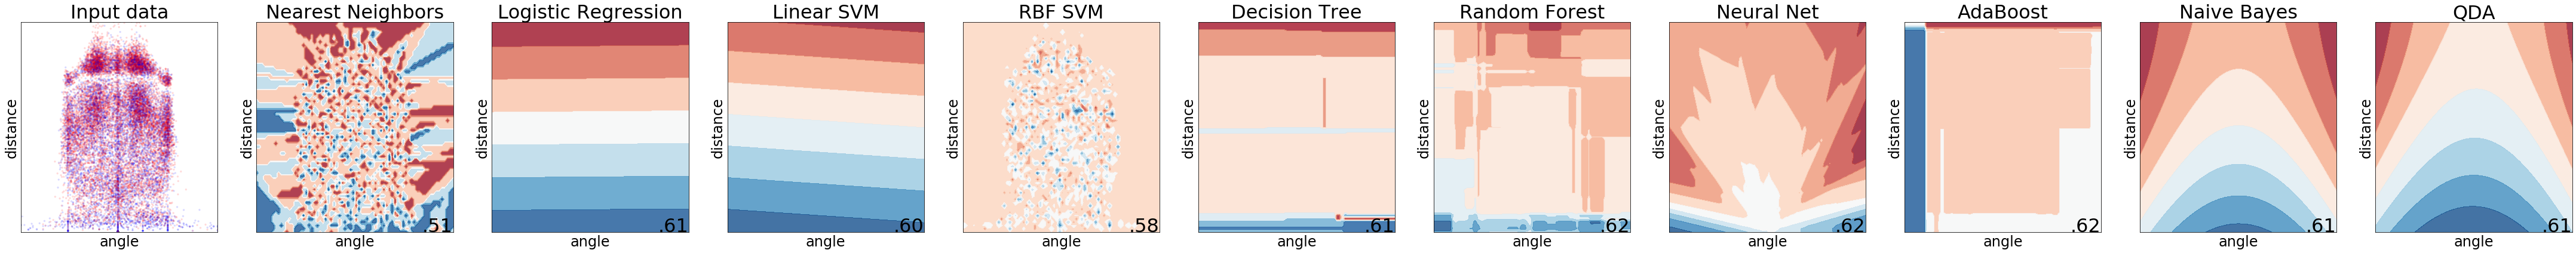

In [45]:
figure = plt.figure(figsize=(60, 6))
i = 1

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data",fontsize=32)

# Plot the training points
ax.scatter(X_train_loc.loc[:, 'angle'], X_train_loc.loc[:, 'dist'], c=y_train_loc, s=6,
           alpha=0.1, cmap=cm_bright)
ax.set_xlabel('angle',fontsize=24)
ax.set_ylabel('distance',fontsize=24)
# Plot the testing points
ax.scatter(X_test_loc.loc[:, 'angle'], X_test_loc.loc[:, 'dist'], c=y_test_loc, cmap=cm_bright, 
           s=6, alpha=0.1)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train_loc, y_train_loc)
    score = clf.score(X_test_loc, y_test_loc)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    # ax.scatter(X_train_loc.loc[:, 'angle'], X_train_loc.loc[:, 'dist'], c=y_train_loc, cmap=cm_bright,
    #            s=6, alpha=0.05)
    # Plot the testing points
    # ax.scatter(X_test_loc.loc[:, 'angle'], X_test_loc.loc[:, 'dist'], c=y_test_loc, cmap=cm_bright,
    #            s=6, alpha=0.05)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name,fontsize=32)
    ax.set_xlabel('angle',fontsize=24)
    ax.set_ylabel('distance',fontsize=24)
    ax.text(xx.max() - .6, yy.min() + .6, ('%.2f' % score).lstrip('0'),
            size=32, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

Apparently, all the classifiers cannot predict the data well, with only an accuracy of 60%.  
That is because of the uncertainty of basketball shots. You cannot promise to make a successful shot in the exact same location which you made last successful shot.

So what we going to do next is to use Logistic Regression to find the contribution of different features to the hit rate.  
By comparing the model of different players, we can find the differences between players.

#### Logistic Regression

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=None)

In [47]:
X_train

,period,season,remain_time,dist,angle,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
1162,3,2000,235,289.001730,0.198255,0,0,0,1,0,0
24194,4,1997,424,0.000000,0.000000,0,0,0,0,1,0
27906,3,2005,466,256.912436,35.174723,0,0,0,1,0,0
19504,3,2012,396,22.472205,-57.724356,0,0,0,0,1,0
24224,2,1997,658,70.256672,-4.899092,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16786,1,2010,575,205.104851,-43.814739,0,0,0,1,0,0
18675,2,2011,254,185.800969,49.365258,0,0,0,1,0,0
8644,2,2005,560,151.330764,-86.211110,0,0,0,1,0,0
8118,3,2005,128,228.372503,-83.715220,0,0,0,1,0,0


In [48]:
X_train.columns.values

array(['period', 'season', 'remain_time', 'dist', 'angle',
       'combined_shot_type_Bank Shot', 'combined_shot_type_Dunk',
       'combined_shot_type_Hook Shot', 'combined_shot_type_Jump Shot',
       'combined_shot_type_Layup', 'combined_shot_type_Tip Shot'],
      dtype=object)

In [49]:
clf_logr = LogisticRegression(C=0.025, max_iter=300, solver='lbfgs')
clf_logr.fit(X_train, y_train)
score_logr = clf_logr.score(X_test, y_test)
print(score_logr)

0.6051025199561747


In [50]:
print(clf_logr.coef_)
print(clf_logr.intercept_)

[[-4.78669455e-02  3.76870703e-04  2.13371509e-04 -2.32385435e-03
   1.11025819e-04  1.50912892e-01  1.20021020e+00 -1.01765073e-02
  -7.29693827e-01 -4.33484831e-01 -1.78711445e-01]]
[-0.00099261]


We can also use scaler to transform the figures into same magnitude

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [52]:
X_train_scale[:5]

array([[ 0.41556056, -1.12655637, -0.42477526,  1.65017499, -0.07155846,
        -0.06982655, -0.20610185, -0.06982655,  0.55108999, -0.46320818,
        -0.07666631],
       [ 1.283024  , -1.74423793,  0.48666426, -1.49894566, -0.07562191,
        -0.06982655, -0.20610185, -0.06982655, -1.81458567,  2.15885654,
        -0.07666631],
       [ 0.41556056, -0.09708711,  0.68920638,  1.30051252,  0.64532321,
        -0.06982655, -0.20610185, -0.06982655,  0.55108999, -0.46320818,
        -0.07666631],
       [ 0.41556056,  1.34416986,  0.35163619, -1.25407624, -1.25874686,
        -0.06982655, -0.20610185, -0.06982655, -1.81458567,  2.15885654,
        -0.07666631],
       [-0.45190288, -1.74423793,  1.6151132 , -0.7333906 , -0.17603426,
        -0.06982655, -0.20610185, -0.06982655,  0.55108999, -0.46320818,
        -0.07666631]])

In [53]:
clf_logr_scale = LogisticRegression(C=0.025, max_iter=300, solver='lbfgs')
clf_logr_scale.fit(X_train_scale, y_train)
score_logr_scale = clf_logr_scale.score(X_test_scale, y_test)
print(score_logr_scale)

0.6063546720926593


In [54]:
print(clf_logr_scale.coef_)
print(clf_logr_scale.intercept_)

[[-0.05526702  0.01789639  0.04604221 -0.19030301  0.00743269  0.09058779
   0.4453808  -0.00298785 -0.18156257 -0.03058441 -0.07514773]]
[-0.18476654]


Use all the data to fix the model

In [55]:
scaler_all = StandardScaler().fit(x)
X_all_scale = scaler_all.transform(x)
X_all_scale.shape

(25556, 11)

In [56]:
X_all_scale[:5]

array([[-1.32183242, -1.12059845,  1.4398261 ,  0.21988712, -1.9252886 ,
        -0.06868568, -0.20761031, -0.07067035,  0.55312121, -0.46428781,
        -0.07735186],
       [-1.32183242, -1.12059845,  0.68344521,  0.34644517, -0.83311378,
        -0.06868568, -0.20761031, -0.07067035,  0.55312121, -0.46428781,
        -0.07735186],
       [-1.32183242, -1.12059845,  0.42810644,  0.93848325,  0.70789887,
        -0.06868568, -0.20761031, -0.07067035,  0.55312121, -0.46428781,
        -0.07735186],
       [-0.45365588, -1.12059845,  0.26912192, -1.4929931 , -0.07755736,
        -0.06868568,  4.81671647, -0.07067035, -1.80792199, -0.46428781,
        -0.07735186],
       [ 0.41452067, -1.12059845,  1.19894046,  0.09351194, -2.01435472,
        -0.06868568, -0.20761031, -0.07067035,  0.55312121, -0.46428781,
        -0.07735186]])

In [57]:
clf_logr_all_scale = LogisticRegression(C=0.025, max_iter=300, solver='lbfgs')
clf_logr_all_scale.fit(X_all_scale, y)
print(clf_logr_all_scale.coef_)
print(clf_logr_all_scale.intercept_)

[[-0.05342771  0.01292057  0.04431536 -0.18233292  0.01487726  0.07947826
   0.4340888  -0.00667161 -0.179645   -0.02549547 -0.0720032 ]]
[-0.17872033]
